In [1]:
import time
inicio = time.time()

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import LeaveOneOut

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# Se importan los datos

In [3]:
df = pd.read_excel("..//Base_datos_Clasificacion binaria.xlsx", index_col = 0)

In [4]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,1738093.21,1484428.72,6,1,0
1,0,469670.24,272492.00,4,0,0
2,0,1025088.19,707310.85,1,0,0
3,0,999890.00,497621.36,6,0,0
4,0,72598.27,47508.92,1,1,0
...,...,...,...,...,...,...
2211,1,5542028.88,5514320.00,6,1,0
2212,1,6095782.00,5100555.00,6,1,0
2213,1,3752906.00,3744400.00,6,1,0
2214,1,23896564.00,19547338.00,6,0,1


# Se estandarizan y normalizan los predictores numericos

In [5]:
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]

In [6]:
scaler = StandardScaler()
stand = scaler.fit_transform(predictores_numericos)

In [7]:
df[["Importe presupuestado", "Importe adjudicado"]] = stand
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,-0.205390,-0.212546
1,-0.237976,-0.248383
2,-0.223707,-0.235525
3,-0.224354,-0.241726
4,-0.248176,-0.255036
...,...,...
2211,-0.107667,-0.093383
2212,-0.093441,-0.105618
2213,-0.153630,-0.145719
2214,0.363860,0.321573


In [8]:
norm = (predictores_numericos - predictores_numericos.min()) / (predictores_numericos.max() - predictores_numericos.min())

In [9]:
df[["Importe presupuestado", "Importe adjudicado"]] = norm
predictores_numericos = df[["Importe presupuestado", "Importe adjudicado"]]
predictores_numericos

,Importe presupuestado,Importe adjudicado
0,0.002679,0.002861
1,0.000699,0.000494
2,0.001566,0.001343
3,0.001526,0.000934
4,0.000079,0.000054
...,...,...
2211,0.008615,0.010734
2212,0.009479,0.009925
2213,0.005823,0.007276
2214,0.037259,0.038147


In [10]:
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,MP,Empresa sancionada,UTE
0,0,0.002679,0.002861,6,1,0
1,0,0.000699,0.000494,4,0,0
2,0,0.001566,0.001343,1,0,0
3,0,0.001526,0.000934,6,0,0
4,0,0.000079,0.000054,1,1,0
...,...,...,...,...,...,...
2211,1,0.008615,0.010734,6,1,0
2212,1,0.009479,0.009925,6,1,0
2213,1,0.005823,0.007276,6,1,0
2214,1,0.037259,0.038147,6,0,1


# Codificacion OneHotEncoder

In [11]:
codificador = OneHotEncoder()

In [12]:
df[["MP", "Empresa sancionada", "UTE"]] = df[["MP", "Empresa sancionada", "UTE"]].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2215
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Licitacion reparto     2216 non-null   int64   
 1   Importe presupuestado  2216 non-null   float64 
 2   Importe adjudicado     2216 non-null   float64 
 3   MP                     2216 non-null   category
 4   Empresa sancionada     2216 non-null   category
 5   UTE                    2216 non-null   category
dtypes: category(3), float64(2), int64(1)
memory usage: 76.1 KB


In [13]:
codificacion = codificador.fit_transform(df[["MP"]])

mercados = pd.DataFrame(codificacion.toarray(),
                        columns = ["MP1", "MP4", "MP6"])
df = pd.concat([df, mercados], axis = 1)
df.drop("MP", axis = 1, inplace = True)
df

,Licitacion reparto,Importe presupuestado,Importe adjudicado,Empresa sancionada,UTE,MP1,MP4,MP6
0,0,0.002679,0.002861,1,0,0.0,0.0,1.0
1,0,0.000699,0.000494,0,0,0.0,1.0,0.0
2,0,0.001566,0.001343,0,0,1.0,0.0,0.0
3,0,0.001526,0.000934,0,0,0.0,0.0,1.0
4,0,0.000079,0.000054,1,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2211,1,0.008615,0.010734,1,0,0.0,0.0,1.0
2212,1,0.009479,0.009925,1,0,0.0,0.0,1.0
2213,1,0.005823,0.007276,1,0,0.0,0.0,1.0
2214,1,0.037259,0.038147,0,1,0.0,0.0,1.0


In [14]:
nombre_clases = ["Licitacion no reparto", "Licitacion reparto"]
nombre_predicciones = list(map(lambda x : x + " predicho", nombre_clases))

# Se hace la estimacion por SVM (Máquinas de Vectores de Soporte)

Se recomienda no usar predict_proba porque realmente es la distancia a la frontera de decisión lo que marca que una instancia sea de una clase u otra. Es mejor usar una decision_function que mide la confianza de la clasificación dada. Si es positiva, se clasificará en la clase positiva. Lo contrario ocurre para valores negativos.

In [15]:
X = df[df.columns[1:]]
y = df["Licitacion reparto"]

loo = LeaveOneOut()
svc = SVC(random_state = 123)
predicciones = []
confianza_predicciones = []

for train_index, test_index in loo.split(X) :
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    y_pred_conf = svc.decision_function(X_test)
    predicciones.append(int(y_pred))
    confianza_predicciones.append(y_pred_conf[0])

In [16]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 123,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# CURVA ROC. El punto optimo es = (fpr = 0, tpr = 1)

In [17]:
auc_score = roc_auc_score(y, confianza_predicciones)
auc_score

0.7794498345951467

In [18]:
fpr, tpr, thresholds = roc_curve(y, confianza_predicciones)
#fpr es 1 - especificidad = 1 - (TN / (FP + TN)) = FP / (FP + TN)
#tpr es la sensibilidad = TP / (TP + FN)

In [19]:
distances = np.linalg.norm(np.column_stack((fpr, tpr)) - np.array([0, 1]), axis=1)
optimal_threshold_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_threshold

-0.9997995942093084

In [20]:
optimal_fpr = fpr[optimal_threshold_index]
optimal_fpr

0.20583468395461912

In [21]:
optimal_tpr = tpr[optimal_threshold_index]
optimal_tpr

0.7150684931506849

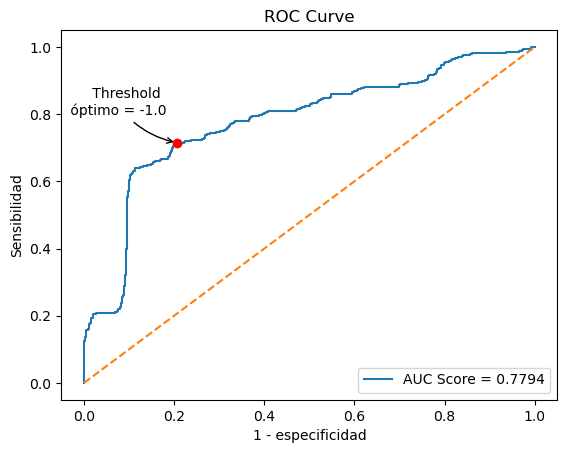

In [22]:
plt.plot(fpr, tpr, label = f'AUC Score = {auc_score:.4}')
plt.plot([0,1], linestyle="--")
plt.plot(optimal_fpr, optimal_tpr, 'ro')
plt.annotate(f'      Threshold\n óptimo = {optimal_threshold:.2}',
             xy=(optimal_fpr, optimal_tpr), xycoords='data',
             xytext=(-80, +20), textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle = "arc3, rad = .2"))
plt.ylabel('Sensibilidad')
plt.xlabel('1 - especificidad')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

# Metricas de la Matriz de Confusion

In [23]:
predicciones = pd.Series(predicciones, name = "Prediccion licitacion reparto")
y_pred_conf = pd.Series(confianza_predicciones, name = "Conf prediccion")
cp = pd.concat([y, predicciones, y_pred_conf], axis = 1)
cp
# Este dataframe no contiene las predicciones calculadas en el punto optimo de la curva ROC.
# Contiene las predicciones calculadas segun el punto por defecto para determinar las predicciones del clasificador.

,Licitacion reparto,Prediccion licitacion reparto,Conf prediccion
0,0,0,-1.009157
1,0,0,-1.276787
2,0,0,-0.991282
3,0,0,-1.000206
4,0,0,-0.999742
...,...,...,...
2211,1,0,-1.003946
2212,1,0,-1.004038
2213,1,0,-1.006887
2214,1,0,-1.001012


In [24]:
cp["Prediccion licitacion reparto en el punto optimo"] = 0
prediccion_final = cp["Prediccion licitacion reparto en el punto optimo"]
prediccion_final = cp.apply(lambda x: 1 if x["Conf prediccion"] >= optimal_threshold else 0, axis=1)
prediccion_final

0       0
1       0
2       1
3       0
4       1
       ..
2211    0
2212    0
2213    0
2214    0
2215    1
Length: 2216, dtype: int64

In [25]:
cp["Prediccion licitacion reparto en el punto optimo"] = prediccion_final
pd.concat([cp, prediccion_final], axis = 1)
cp.drop(columns = "Prediccion licitacion reparto", axis = 1, inplace = True)
cp

,Licitacion reparto,Conf prediccion,Prediccion licitacion reparto en el punto optimo
0,0,-1.009157,0
1,0,-1.276787,0
2,0,-0.991282,1
3,0,-1.000206,0
4,0,-0.999742,1
...,...,...,...
2211,1,-1.003946,0
2212,1,-1.004038,0
2213,1,-1.006887,0
2214,1,-1.001012,0


In [26]:
cm = confusion_matrix(y, cp["Prediccion licitacion reparto en el punto optimo"]) # matriz de confusion
cm = pd.DataFrame(cm, columns = nombre_clases, index = nombre_predicciones)
cm # esta matriz de confusion esta calculada en el punto optimo de la curva

,Licitacion no reparto,Licitacion reparto
Licitacion no reparto predicho,1470,381
Licitacion reparto predicho,104,261


In [27]:
TP = cm.iloc[1,1]
FN = cm.iloc[1,0]
FP = cm.iloc[0,1]
TN = cm.iloc[0,0]

In [28]:
Tasa_de_aciertos = (TP + TN) / len(df)
Tasa_de_aciertos

0.7811371841155235

In [29]:
Tasa_de_errores = 1 - Tasa_de_aciertos
Tasa_de_errores

0.21886281588447654

In [30]:
Sensibilidad = TP / (TP + FN)
Sensibilidad # se calculo antes. Es optimal_tpr

0.7150684931506849

In [31]:
Tasa_de_falsos_negativos = 1 - Sensibilidad
Tasa_de_falsos_negativos

0.2849315068493151

In [32]:
Especificidad = TN / (FP + TN)
Especificidad # se calculo antes. Es optimal_fpr = 1 - Especificidad 

0.7941653160453809

In [33]:
Precision = TP / (TP + FP)
Precision

0.40654205607476634

In [34]:
FP / (FP + TP) # 1 - Precision

0.5934579439252337

In [35]:
F1 = (2 * Sensibilidad * Precision) / (Sensibilidad + Precision)
F1

0.5183714001986097

# Métricas de clasificación binaria en el punto óptimo

In [36]:
nombre_fichero = "Clasificacion binaria svm"

In [37]:
indice_resultados = ["Tasa de aciertos", "Sensibilidad", "Especificidad", "Precision", "F1"]
resultados_valores = [Tasa_de_aciertos, Sensibilidad, Especificidad, Precision, F1]

resultados = pd.DataFrame(data={f"{nombre_fichero}": resultados_valores},
                          index=indice_resultados)
resultados

,Clasificacion binaria svm
Tasa de aciertos,0.781137
Sensibilidad,0.715068
Especificidad,0.794165
Precision,0.406542
F1,0.518371


## Se exportan los datos

In [38]:
nombre_columna = list(resultados.columns)[0]
resultados.to_excel(f"Resultados de las métricas de {nombre_fichero}.xlsx")

# CURVA PR. El punto óptimo es = (precision = 1, recall = 1)

In [39]:
average_precision = average_precision_score(y, confianza_predicciones)
average_precision

0.4906662461069725

In [40]:
precision, recall, thresholds = precision_recall_curve(y, confianza_predicciones)
#precision = TP / (TP + FP)
#recall = sensibilidad = TP / (TP + FN)

In [41]:
distances = np.linalg.norm(np.column_stack((precision, recall)) - np.array([1, 1]), axis=1)
optimal_threshold_index = np.argmin(distances)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_threshold

-0.9929994188854695

In [42]:
optimal_precision = precision[optimal_threshold_index]
optimal_precision

0.5432692307692307

In [43]:
optimal_recall = recall[optimal_threshold_index]
optimal_recall

0.6191780821917808

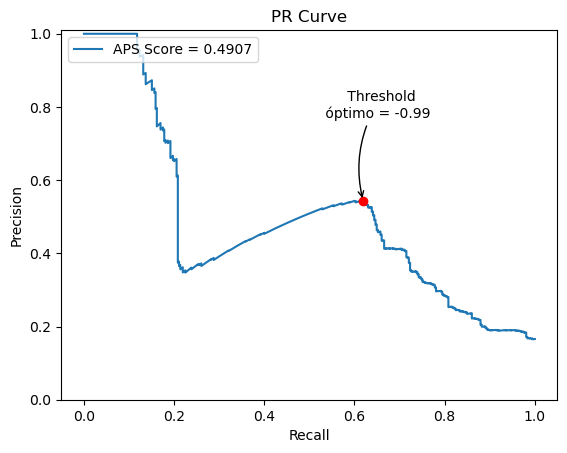

In [44]:
plt.plot(recall, precision, label = f'APS Score = {average_precision:.4}')
plt.plot(optimal_recall, optimal_precision, 'ro')
plt.annotate(f'      Threshold\n óptimo = {optimal_threshold:.2}',
             xy=(optimal_recall, optimal_precision), xycoords='data',
             xytext=(-30, +60) ,textcoords='offset points', fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle = "arc3, rad = .2"))
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('PR Curve')
plt.legend(loc = 'upper left')
plt.ylim(0, 1.01)
plt.show()

# Se calcula cuanto tiempo ha transcurrido en la ejecucion de todo el notebook y se guarda el tiempo en un fichero de texto para almacenarlo.

In [45]:
fin = time.time()
tiempo_transcurrido = fin - inicio
minutos = int((tiempo_transcurrido % 3600) // 60)
segundos = int(tiempo_transcurrido % 60)
with open(f"Tiempo de ejecucion transcurrido en el notebook {nombre_fichero}.txt", "w") as f :
    f.write(f"Tiempo transcurrido: {minutos} minutos, {segundos} segundos")

In [46]:
print(f"Tiempo transcurrido: {minutos} minutos, {segundos} segundos")

Tiempo transcurrido: 3 minutos, 58 segundos
